# Cloning Quasars

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation? 

(Hint: It shouldn't. But why?) 

(Hint: `astropy.cosmology` is another close friend). The best-fit cosmological model from the Plack data is:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

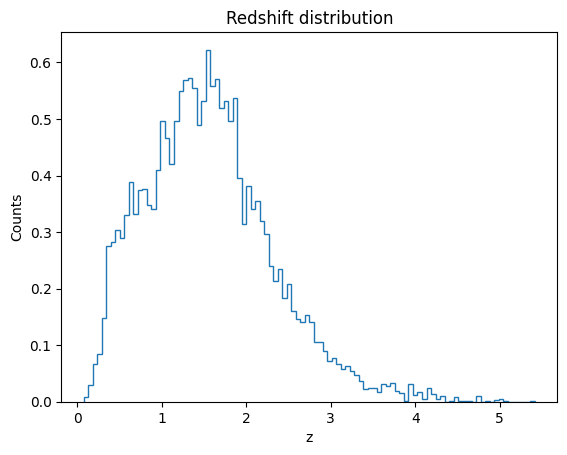

In [5]:
counts = plt.hist(z, 100, density = True, histtype = 'step')
#plt.plot(counts[1][:100], counts[0])
plt.xlabel('z')
plt.ylabel('Counts')
plt.title('Redshift distribution')
plt.show()

In [6]:
import scipy.stats

In [8]:
dist = scipy.stats.rv_histogram ( np.histogram(z, 100) )

## Rejection sampling
We define a uniform distibution in the interval $x \in 0, z_\mathrm{max}$ to sample $x_i$, then another uniform distribution for $y \in 0,p_\mathrm{max}$ from which we generate $y_i$. If $y_i <=$ counts$(x_i)$, we accept the sample.

In [11]:
zmax = max(z)
pmax = max(counts[0])

n_samples = 10000
rsamples = []

while len(rsamples) < n_samples:
    x_i = np.random.uniform(0, zmax)
    if (np.random.uniform(0, pmax) <= dist.pdf(x_i)): rsamples.append(x_i)

## Inverse transform sampling
We need the quantile function $H^{-1}(x)$ which is given by .ppf (Percent point function). Sampling $q_i$ from a uniform distribution in $(0,1)$, our redshift samples are given by ppf(q_i).

In [16]:
q_i = np.random.uniform(0, 1, n_samples)
isamples = [dist.ppf(qi) for qi in q_i]

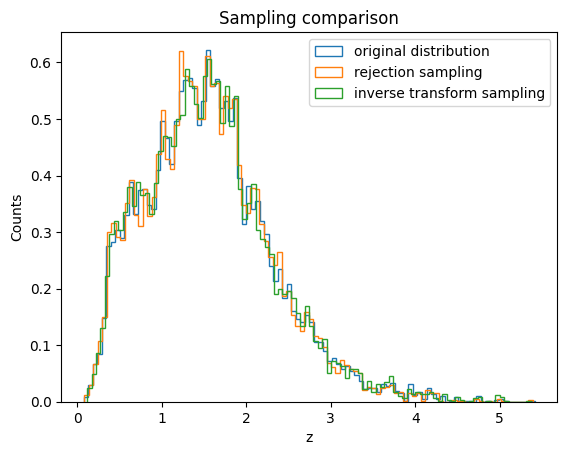

In [18]:
plt.hist(z, 100, density = True, histtype = 'step', label = 'original distribution')
plt.hist(rsamples, 100, density = True, histtype = 'step', label = 'rejection sampling')
plt.hist(isamples, 100, density = True, histtype = 'step', label = 'inverse transform sampling')
plt.xlabel('z')
plt.ylabel('Counts')
plt.title('Sampling comparison')
plt.legend()
plt.show()

## Theoretical distribution
Assuming quasars to be uniformly distributed in volume:

In [21]:
import astropy

In [25]:
model = astropy.cosmology.Planck18
zz = np.linspace(0, zmax, 200)
volume = 4.*np.pi*model.differential_comoving_volume(zz).value

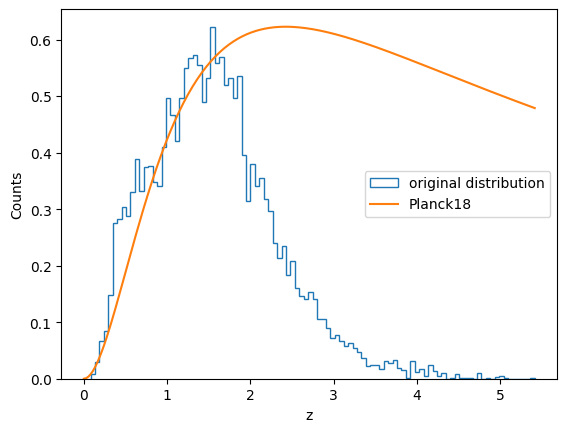

In [37]:
plt.hist(z, 100, density = True, histtype = 'step', label = 'original distribution')
plt.plot(zz, volume / 8.5e11, label = str(model.name))
plt.xlabel('z')
plt.ylabel('Counts')
plt.legend()
plt.show()

At lower redshift (up until $z \simeq 2$) the theoretical distribution seems to fit our data. For higher redshifts selection effects could come into play, i.e. the telescope is not as sensitive for higher z.